In [4]:
import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
plt.style.use('seaborn')
%matplotlib inline

In [6]:
df = pd.read_csv('Ecommerce Customers')
df.shape

(500, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [9]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
df.drop(['Email','Address'],axis=1,inplace=True)
df.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [12]:
df['Avatar'].unique()

array(['Violet', 'DarkGreen', 'Bisque', 'SaddleBrown', 'MediumAquaMarine',
       'FloralWhite', 'DarkSlateBlue', 'Aqua', 'Salmon', 'Brown',
       'Tomato', 'RoyalBlue', 'DarkBlue', 'Peru', 'PowderBlue',
       'OliveDrab', 'Cyan', 'LightSeaGreen', 'PeachPuff', 'Black',
       'Olive', 'Silver', 'Wheat', 'Teal', 'Linen', 'MediumSlateBlue',
       'LemonChiffon', 'DarkOrchid', 'SeaGreen', 'SteelBlue',
       'DarkMagenta', 'DarkGoldenRod', 'DarkSeaGreen', 'Gainsboro',
       'HotPink', 'HoneyDew', 'WhiteSmoke', 'GhostWhite', 'Chocolate',
       'Snow', 'BurlyWood', 'Moccasin', 'BlueViolet', 'MediumBlue',
       'GreenYellow', 'SandyBrown', 'MediumVioletRed', 'DarkOliveGreen',
       'DarkSalmon', 'DeepPink', 'SkyBlue', 'Magenta', 'DarkTurquoise',
       'SpringGreen', 'OrangeRed', 'LimeGreen', 'LightGreen',
       'LightYellow', 'MintCream', 'DimGray', 'Indigo', 'LightSalmon',
       'DeepSkyBlue', 'Turquoise', 'LightSteelBlue', 'Cornsilk',
       'DarkKhaki', 'FireBrick', 'SlateGray',

<Figure size 720x720 with 0 Axes>

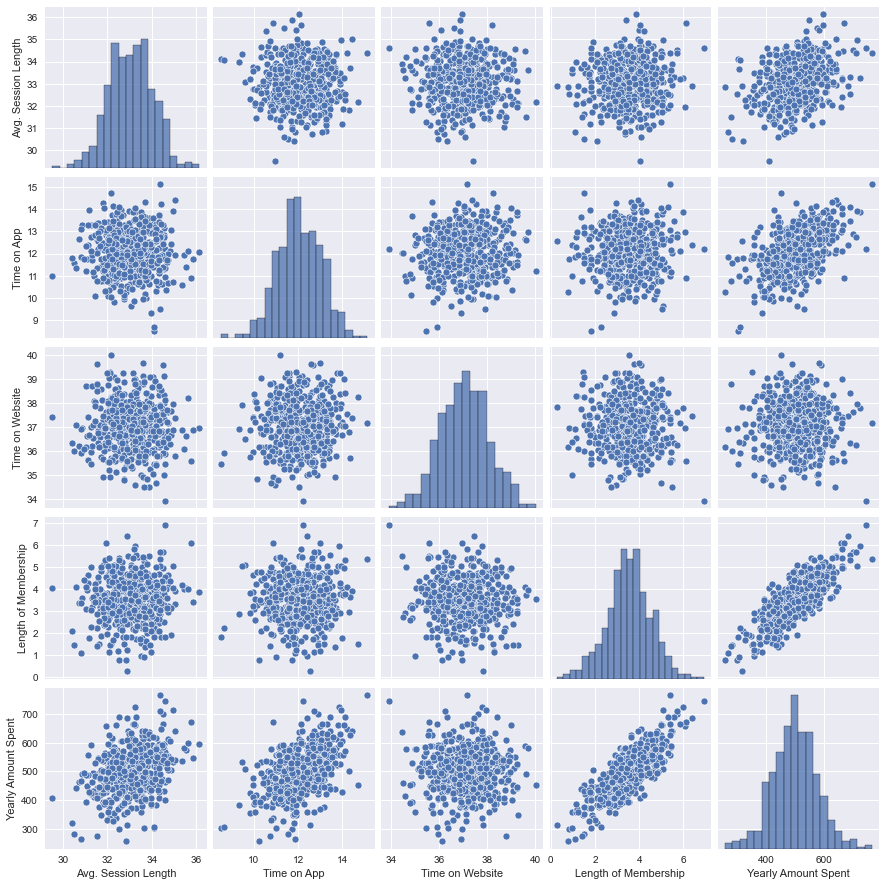

In [13]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df)
plt.show()

In [14]:
df.columns

Index(['Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [15]:
cols_to_scale = ['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']
scale = MinMaxScaler()
scalled = scale.fit_transform(df[cols_to_scale])

In [16]:
i = 0
for col in cols_to_scale:
    df[col] = scalled[:,i]
    i += 1

In [17]:
df.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,0.751425,0.626620,0.929816,0.573101,587.951054
1,DarkGreen,0.362306,0.393016,0.550801,0.359869,392.204933
2,Bisque,0.524953,0.426378,0.524803,0.576396,487.547505
3,SaddleBrown,0.722409,0.787050,0.460890,0.428434,581.852344
4,MediumAquaMarine,0.574861,0.647702,0.594748,0.627768,599.406092


<Figure size 720x720 with 0 Axes>

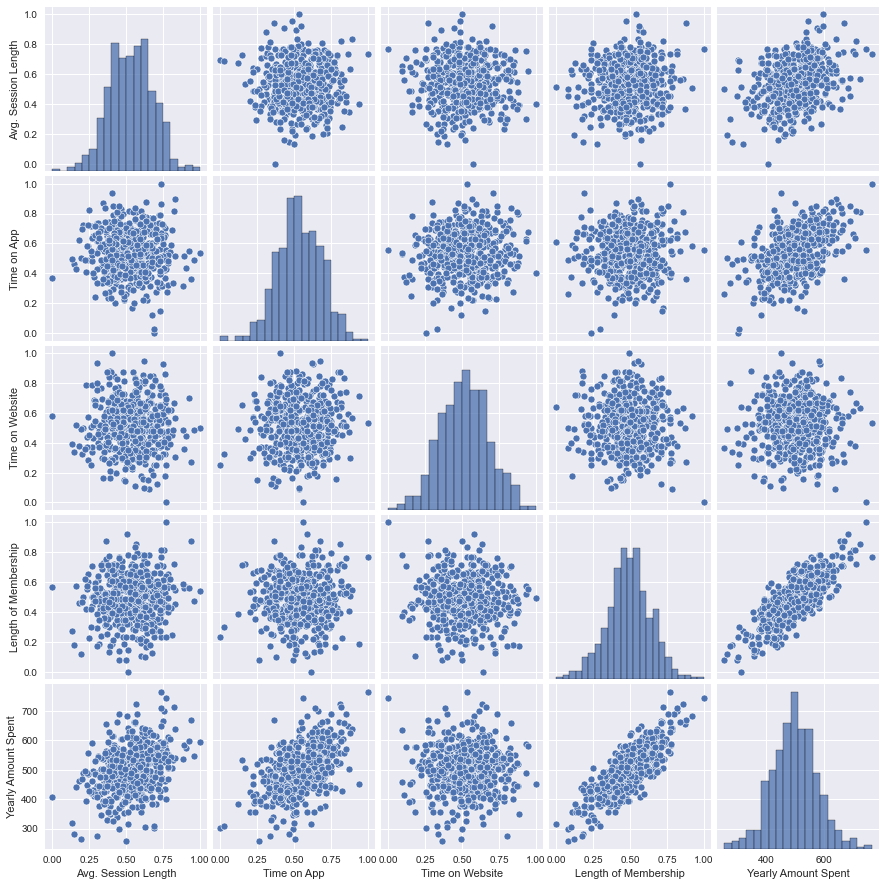

In [18]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df)
plt.show()

In [19]:
df.drop('Avatar',axis=1, inplace=True)

In [20]:
x, y = df.drop(['Yearly Amount Spent'],axis=1),df['Yearly Amount Spent']
x.shape,y.shape

((500, 4), (500,))

In [21]:
models = [LinearRegression(), Ridge(), Lasso(), KNeighborsRegressor(), SVR()]

In [22]:
for model in models:
    print("Model:",model)
    print(cross_val_score(model, x, y, cv=5))
    print('\n')

Model: LinearRegression()
[0.98274654 0.9821047  0.98717189 0.9842572  0.98219012]


Model: Ridge()
[0.97691721 0.97409022 0.9784935  0.97543602 0.96705767]


Model: Lasso()
[0.96478591 0.96625984 0.96451355 0.96186461 0.95641679]


Model: KNeighborsRegressor()
[0.91376266 0.90873761 0.91214528 0.89078962 0.89737217]


Model: SVR()
[0.4058705  0.41761134 0.39362741 0.3790456  0.39210895]




In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((350, 4), (150, 4), (350,), (150,))

In [24]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [25]:
model.score(x_test, y_test)

0.9847572015698434

In [26]:
model.score(x_train, y_train)

0.9839541189364899

In [27]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [28]:
test = pd.DataFrame({
    'Y test':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Y train':y_train,
    'Y train predicted':y_pred_train
})

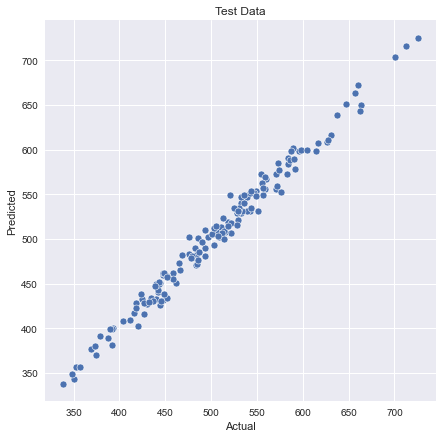

In [29]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=test, x='Y test', y='Y test predicted')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Test Data")
plt.show()

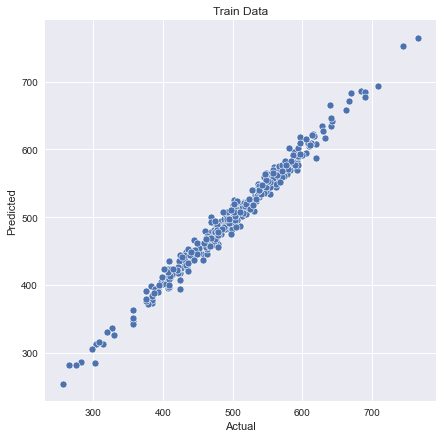

In [30]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=train, x='Y train', y='Y train predicted')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Train Data")
plt.show()

In [31]:
test.sample(10)

,Y test,Y test predicted
383,583.977802,584.027389
95,543.340166,553.743579
210,496.554082,501.777482
337,440.002748,449.245178
411,589.026490,601.334046
353,558.948112,569.198338
228,458.376911,455.119949
208,412.012931,409.177718
234,493.180216,510.440023
350,535.480775,548.666807


In [32]:
train.sample(10)

,Y train,Y train predicted
56,520.898794,523.897597
147,479.731938,479.875658
66,553.601535,551.996646
168,506.536393,524.098758
28,529.537665,520.666961
170,421.966794,417.868853
461,502.771075,495.500484
45,549.860590,552.330176
458,537.915753,543.377790
97,614.715334,623.051653
